In [106]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


# CSV 파일 불러오기
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/abalone.csv"
df = pd.read_csv(url)
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [107]:
df.info() # 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


In [108]:
df = df.drop(columns= 'id') # 결측치 제거
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [109]:
df['Sex'].value_counts() # 레이블 인코딩 전 데이터 개수 확인

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

In [110]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex']) # 레이블 인코딩

In [111]:
df['Sex'].value_counts() # 레이블 인코딩 전 데이터 개수 확인

Sex
2    1528
1    1342
0    1307
Name: count, dtype: int64

In [112]:
from sklearn.preprocessing import StandardScaler
# 데이터 분리
X= df.drop(columns=['Sex'],axis=1)
y= df['Sex']
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(df)
X_scaled

array([[ 1.15198011, -0.57455813, -0.43214879, ..., -0.72621157,
        -0.63821689,  1.57154357],
       [ 1.15198011, -1.44898585, -1.439929  , ..., -1.20522124,
        -1.21298732, -0.91001299],
       [-1.28068972,  0.05003309,  0.12213032, ..., -0.35668983,
        -0.20713907, -0.28962385],
       ...,
       [ 1.15198011,  0.6329849 ,  0.67640943, ...,  0.97541324,
         0.49695471, -0.28962385],
       [-1.28068972,  0.84118198,  0.77718745, ...,  0.73362741,
         0.41073914,  0.02057072],
       [ 1.15198011,  1.54905203,  1.48263359, ...,  1.78744868,
         1.84048058,  0.64095986]])

In [113]:
y= pd.get_dummies(y)

In [114]:
y

,0,1,2
0,False,False,True
1,False,False,True
2,True,False,False
3,False,False,True
4,False,True,False
...,...,...,...
4172,True,False,False
4173,False,False,True
4174,False,False,True
4175,True,False,False


In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [116]:
from sklearn.metrics import confusion_matrix

In [117]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
dt_cm = confusion_matrix(y_test.values.argmax(axis=1), dt_pred.argmax(axis=1))
print("==================== Decision Tree ========================")
print(f"Accuracy: {accuracy_score(y_test, dt_pred):.2f}")
print("confusuon_matrix:\n",dt_cm)

==================== Decision Tree ========================
Accuracy: 1.00
confusuon_matrix:
 [[262   0   0]
 [  0 267   0]
 [  0   0 307]]


In [118]:
# Random Forest

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test.values.argmax(axis=1), rf_pred.argmax(axis=1))
print("==================== Random Forest ========================")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.2f}")
print("confusuon_matrix:\n",rf_cm)

==================== Random Forest ========================
Accuracy: 1.00
confusuon_matrix:
 [[262   0   0]
 [  0 267   0]
 [  0   0 307]]


In [119]:
# SVM

svm_y_train = np.argmax(y_train, axis=1) # SVM 모델을 위한 레이블 변환
svm_y_test = np.argmax(y_test, axis=1) # SVM 모델을 위한 레이블 변환
svm_model = SVC()
svm_model.fit(X_train, svm_y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(svm_y_test, svm_pred)
svm_cm = confusion_matrix(svm_y_test, svm_pred)
print("================ Support Vector Machine ====================")
print(f"Accuracy: {accuracy_score(svm_y_test, svm_pred):.2f}")
print("confusuon_matrix:\n",svm_cm)

================ Support Vector Machine ====================
Accuracy: 1.00
confusuon_matrix:
 [[262   0   0]
 [  0 267   0]
 [  0   0 307]]


In [120]:
#LR
LR_y_train = np.argmax(y_train, axis=1) # SVM 모델을 위한 레이블 변환
LR_y_test = np.argmax(y_test, axis=1) # SVM 모델을 위한 레이블 변환
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, LR_y_train)
lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(LR_y_test, lr_pred)
lr_cm = confusion_matrix(LR_y_test, lr_pred)
print("================= Logistic Regression ====================")
print(f"Accuracy: {accuracy_score(LR_y_test, lr_pred):.2f}")
print("confusuon_matrix:\n",lr_cm)

================= Logistic Regression ====================
Accuracy: 1.00
confusuon_matrix:
 [[262   0   0]
 [  0 267   0]
 [  0   0 307]]


In [121]:
#KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test,knn_pred)
knn_cm = confusion_matrix(y_test.values.argmax(axis=1), knn_pred.argmax(axis=1))
print("================= K-Nearest Neighbors ====================")
print(f"Accuracy: {accuracy_score(y_test, knn_pred):.2f}")
print("confusuon_matrix:\n",knn_cm)

================= K-Nearest Neighbors ====================
Accuracy: 1.00
confusuon_matrix:
 [[262   0   0]
 [  0 267   0]
 [  0   0 307]]


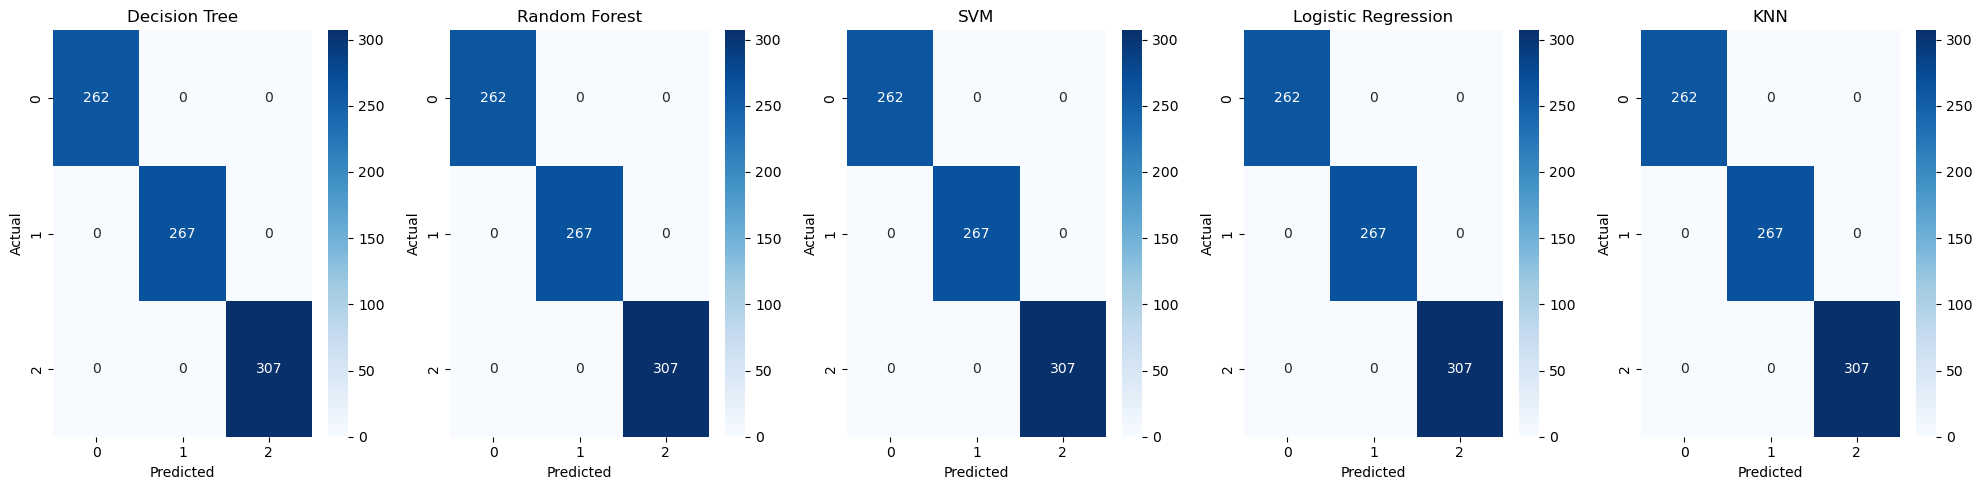

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 모델 리스트와 이름
models = [dt_model, rf_model, svm_model, lr_model, knn_model]
model_names = ['Decision Tree', 'Random Forest', 'SVM', 'Logistic Regression', 'KNN']

# Confusion Matrix 시각화
fig, axes = plt.subplots(1, len(models), figsize=(20, 5))  # 한 행에 모든 모델의 그래프 배치

for i, (model, name) in enumerate(zip(models, model_names)):
    # 모델별 Confusion Matrix 계산
    if name in ['SVM', 'Logistic Regression']:
        cm = confusion_matrix(np.argmax(y_test.values, axis=1), model.predict(X_test))
    else:
        cm = confusion_matrix(y_test.values.argmax(axis=1), model.predict(X_test).argmax(axis=1))
    
    # Confusion Matrix 시각화
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(name, fontsize=12)
    axes[i].set_xlabel('Predicted', fontsize=10)
    axes[i].set_ylabel('Actual', fontsize=10)

plt.tight_layout()
plt.show()

In [123]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

model = Sequential()
# input_dim = 13 (X_train.shape[1])
model.add(Dense(9, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax')) # multi classification

model.compile( optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy']) # multi classification

model.summary()

c:\Users\outla\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,565 (6.11 KB)

 Trainable params: 1,565 (6.11 KB)

 Non-trainable params: 0 (0.00 B)

In [124]:
history=model.fit(x=X_train, y=y_train, epochs=50, batch_size=30, validation_data= (X_test,y_test))

Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6980 - loss: 0.8344 - val_accuracy: 0.9450 - val_loss: 0.2518
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9515 - loss: 0.2026 - val_accuracy: 0.9928 - val_loss: 0.0604
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9868 - loss: 0.0541 - val_accuracy: 0.9976 - val_loss: 0.0213
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9984 - loss: 0.0188 - val_accuracy: 0.9976 - val_loss: 0.0106
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9993 - loss: 0.0083 - val_accuracy: 0.9988 - val_loss: 0.0070
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9991 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9995 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.

In [125]:
model.predict(X_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[4.5714411e-11, 1.0070504e-05, 9.9998999e-01],
       [3.2383703e-12, 2.9960179e-06, 9.9999702e-01],
       [1.0000000e+00, 1.3737711e-09, 5.9987400e-23],
       ...,
       [2.7268554e-06, 9.9999166e-01, 5.6121171e-06],
       [4.7319600e-06, 9.9999452e-01, 7.6654749e-07],
       [1.7020596e-07, 9.9999940e-01, 4.3195021e-07]], dtype=float32)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Text(0.5, 1.0, 'Confusion Matrix')

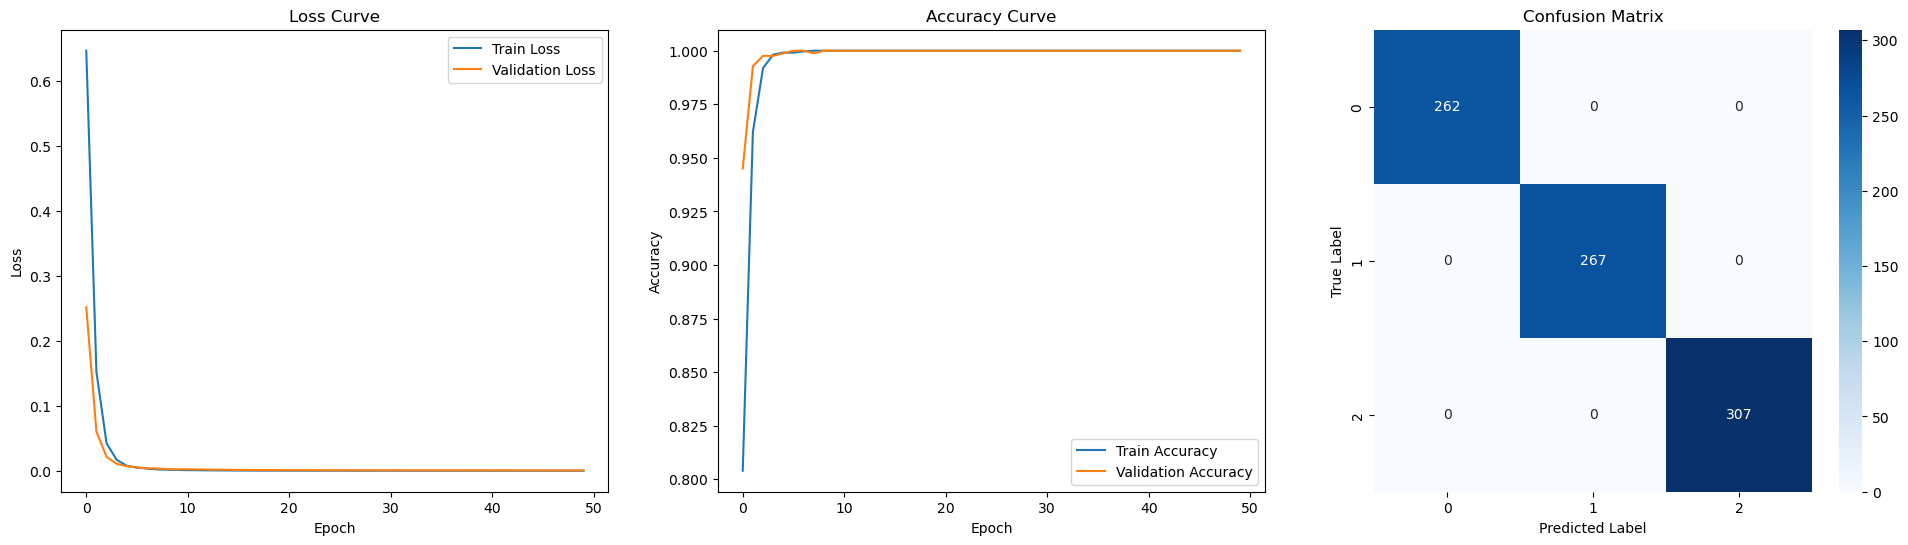

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# 기존 학습 그래프
plt.figure(figsize=(24, 6))

#  손실(Loss) 그래프
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

# 정확도(Accuracy) 그래프
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

# 혼동 행렬(Confusion Matrix) 시각화
y_pred = model.predict(X_test)  # 테스트 데이터 예측
y_test_class = np.argmax(y_test, axis=1)  # 원-핫 인코딩된 y_test를 클래스 레이블로 변환
y_pred_class = np.argmax(y_pred, axis=1)  # multi classification
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(y_test.shape[1]), yticklabels=range(y_test.shape[1]))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")